# Project: Investigating a Soccer Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#SQL">SQL Code</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I have selected to use the [European Soccer Dataset](https://www.kaggle.com/hugomathien/soccer) from Kaggle which includes the results to European league match games from 2008 to 2016.

>I plan to explore: <br>
>1) What leagues have the greatest home field advantage in regards to home goal differential? <br>
>2) What leagues have the greatest home field advantage in regards to home point differential? <br>
>3) Do the leagues with the highest home goal differential also have the highest home point differential?
    >How well are those correlated? <br>
>4) Does the amount of goals scored in a game on average impact home team's point differential or goal differential?


<a id='SQL Code'></a>
## SQL Code

>This is the code that was used in SQL to export the CSV I will import and use in this project.

>SELECT League.name League_Name, Match.Home_Team_Goal Home_Team_Goal, Match.Away_Team_Goal Away_Team_Goal       
FROM League
<br>
JOIN Match
<br>
ON League.id = Match.league_id




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> Most of the data wrangling took place in my SQL query and only extracting the code I needed from there.

### General Properties

In [2]:
df = pd.read_csv('/Users/markverso/Documents/Python/Soccer DataSet Python.csv')
df.head()

,League_Name,Home_Team_Goal,Away_Team_Goal
0,Belgium Jupiler League,1,1
1,Belgium Jupiler League,0,0
2,Belgium Jupiler League,0,3
3,Belgium Jupiler League,5,0
4,Belgium Jupiler League,1,3


### Data Cleaning

>The data is clean. All rows do not have null values and are in the format they are required to be in for analysis.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   League_Name     25979 non-null  object
 1   Home_Team_Goal  25979 non-null  int64 
 2   Away_Team_Goal  25979 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 609.0+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### What leagues have the greatest home Goal Differential Advantage?

>To figure this out, I want to get the goal differential for each game.

In [4]:
df['Home_Goal_Differential'] = df['Home_Team_Goal'] - df['Away_Team_Goal']
df['Home_Goal_Differential']

0        0
1        0
2       -3
3        5
4       -2
        ..
25974    1
25975   -1
25976    2
25977    0
25978    1
Name: Home_Goal_Differential, Length: 25979, dtype: int64

>The average goal differential for European leagues is .38 goals as seen below.

In [5]:
df.describe()

,Home_Team_Goal,Away_Team_Goal,Home_Goal_Differential
count,25979.000000,25979.000000,25979.000000
mean,1.544594,1.160938,0.383656
std,1.297158,1.142110,1.782403
min,0.000000,0.000000,-9.000000
25%,1.000000,0.000000,-1.000000
50%,1.000000,1.000000,0.000000
75%,2.000000,2.000000,1.000000
max,10.000000,9.000000,10.000000


In [6]:
home_goal_avg = df['Home_Team_Goal'].mean()
away_goal_avg = df['Away_Team_Goal'].mean()
home_goal_diff = df['Home_Goal_Differential'].mean()
home_goal_avg, away_goal_avg, home_goal_diff

(1.5445937103044767, 1.1609376804341969, 0.38365602987027986)

Home_Team_Goal            1.544594
Away_Team_Goal            1.160938
Home_Goal_Differential    0.383656
dtype: float64

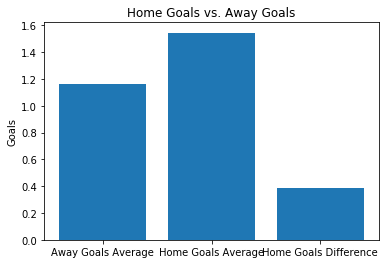

In [7]:
plt.bar(["Away Goals Average", "Home Goals Average", "Home Goals Difference"], [away_goal_avg, home_goal_avg, home_goal_diff])
plt.title("Home Goals vs. Away Goals")
plt.ylabel("Goals");

df.mean()

>Below I look at how many goals are typically scored in a game by the home and away teams. This is helpful because below you see that in over 2/3's of games, away teams score 0 or 1 goals while the home generates 2 or more goals in a close to 45% of all games.
>Furthermore, the rarity of 3+ goal games indicates that most games are decided by a goal or less which is shown on third histogram below. This indicates that most goals are crucial to a games outcome and a partial goal advantage on average would mean a significant difference in points gained.

,Away_Team_Goal
count,25979.000000
mean,1.160938
std,1.142110
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,9.000000


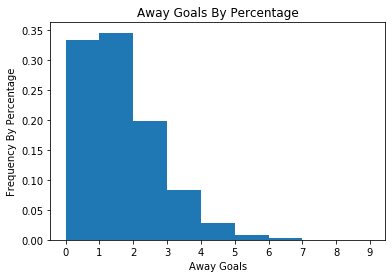

In [8]:
ax = df["Away_Team_Goal"].plot.hist(weights = np.ones_like(df.index) / len(df.index), 
                               bins = max(df["Away_Team_Goal"]) - min(df["Away_Team_Goal"]),
                               xticks = df["Away_Team_Goal"].unique().tolist(), title = 'Away Goals By Percentage') 
ax.set_xlabel("Away Goals")
ax.set_ylabel("Frequency By Percentage")

pd.DataFrame(df["Away_Team_Goal"].describe())

,Home_Team_Goal
count,25979.000000
mean,1.544594
std,1.297158
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,10.000000


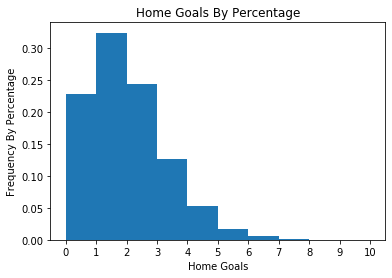

In [9]:
dx = df["Home_Team_Goal"].plot.hist(weights = np.ones_like(df.index) / len(df.index), 
                               bins = max(df["Home_Team_Goal"]) - min(df["Home_Team_Goal"]), 
                               xticks = df["Home_Team_Goal"].unique().tolist(), title = 'Home Goals By Percentage') 
dx.set_xlabel("Home Goals")
dx.set_ylabel("Frequency By Percentage")

pd.DataFrame(df["Home_Team_Goal"].describe())

In [10]:
xtick = df["Home_Goal_Differential"].unique().tolist()
print(xtick)

[0, -3, 5, -2, -1, 1, 3, 2, 4, -4, -6, 6, -5, 7, 8, -9, -7, 10, 9, -8]


,Home_Goal_Differential
count,25979.000000
mean,0.383656
std,1.782403
min,-9.000000
25%,-1.000000
50%,0.000000
75%,1.000000
max,10.000000


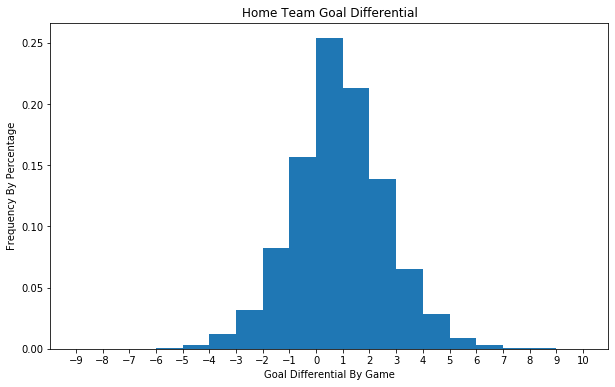

In [11]:
cx = df["Home_Goal_Differential"].plot.hist(weights = np.ones_like(df.index) / len(df.index), 
                                       bins = max(df["Home_Goal_Differential"]) - min(df["Home_Goal_Differential"]),
                                       xticks = df["Home_Goal_Differential"].unique().tolist(),
                                       figsize = (10,6), title = 'Home Team Goal Differential') 
cx.set_xlabel("Goal Differential By Game")
cx.set_ylabel("Frequency By Percentage")

pd.DataFrame(df["Home_Goal_Differential"].describe())

>Below is a sorted list of European soccer leagues.

In [12]:
League_Home_Goal_Differential = df.groupby('League_Name')['Home_Goal_Differential'].mean().nlargest(len('League_Name'))
League_Home_Goal_Differential

League_Name
Spain LIGA BBVA             0.495395
Netherlands Eredivisie      0.478758
Belgium Jupiler League      0.417245
Switzerland Super League    0.396624
England Premier League      0.391447
Italy Serie A               0.384819
Poland Ekstraklasa          0.364583
France Ligue 1              0.362829
Germany 1. Bundesliga       0.351716
Portugal Liga ZON Sagres    0.282164
Scotland Premier League     0.224781
Name: Home_Goal_Differential, dtype: float64

### What leagues have the greatest Home Point Differential Advantage? 

> To understand the league home point differential, you take the home average points minus the away points. The reason why you do this instead of just taking the home point average is that a league that contains all ties would equate to each team getting 1 point per game while a league that has 0 ties would give teams an average of 1.5 points per game (3 to the victor, 0 to the loser). So, home victories matter more in league with more ties. 

In [13]:
df['Home_Points'] = df['Home_Goal_Differential'].apply(lambda x: 3 if x > 0 else (1 if x == 0 else 0))
df['Home_Points'].mean()

1.6300473459332538

In [14]:
df['Away_Points'] = df['Home_Goal_Differential'].apply(lambda x: 3 if x < 0 else (1 if x == 0 else 0))
df['Away_Points'].mean()

1.1160552754147581

In [15]:
df['Home_Point_Differential'] = df['Home_Points'] - df['Away_Points']
df['Home_Point_Differential'].mean()

0.5139920705184957

In [16]:
League_Home_Point_Differential = df.groupby('League_Name')['Home_Point_Differential'].mean().nlargest(len('League_Name'))
League_Home_Point_Differential

League_Name
Spain LIGA BBVA             0.625658
Italy Serie A               0.589659
Netherlands Eredivisie      0.582108
Belgium Jupiler League      0.550347
Poland Ekstraklasa          0.539062
France Ligue 1              0.529934
England Premier League      0.516118
Switzerland Super League    0.472574
Germany 1. Bundesliga       0.444853
Portugal Liga ZON Sagres    0.434211
Scotland Premier League     0.235197
Name: Home_Point_Differential, dtype: float64

### Does a game that includes additional goals for the home team lead to more points for the home team as well?

> To understand the correlation I plotted the Home Point Differential and Home Goal Differential on a scatter plot. In order to do this, I have to make both data points part of the same data frame.

> I compare the home point differential and home goal differential by making them data frames, which enables me to join them together based on their league names. I use that data to make a plot below.

In [17]:
League_Home_Point_Differential = League_Home_Point_Differential.to_frame()

In [18]:
League_Home_Goal_Differential = League_Home_Goal_Differential.to_frame()

In [19]:
results = League_Home_Point_Differential.merge(League_Home_Goal_Differential, on = 'League_Name')

/Users/markverso/opt/anaconda3/envs/Investigating_A_Dataset/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Home_Point_Differential,Home_Goal_Differential
League_Name,,
Belgium Jupiler League,0.550347,0.417245
England Premier League,0.516118,0.391447
France Ligue 1,0.529934,0.362829
Germany 1. Bundesliga,0.444853,0.351716
Italy Serie A,0.589659,0.384819
Netherlands Eredivisie,0.582108,0.478758
Poland Ekstraklasa,0.539062,0.364583
Portugal Liga ZON Sagres,0.434211,0.282164
Scotland Premier League,0.235197,0.224781


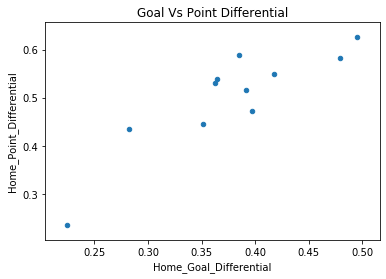

In [20]:
results.plot(x = 'Home_Goal_Differential', y = 'Home_Point_Differential', kind = 'scatter', title = 'Goal Vs Point Differential')
results.groupby('League_Name')['Home_Point_Differential','Home_Goal_Differential'].mean()

In [21]:
df['intercept'] = 1

lm = sm.OLS(df['Home_Point_Differential'], df[['intercept', 'Home_Goal_Differential']])
result = lm.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Home_Point_Differential   R-squared:                       0.739
Model:                                 OLS   Adj. R-squared:                  0.739
Method:                      Least Squares   F-statistic:                 7.371e+04
Date:                     Wed, 15 Apr 2020   Prob (F-statistic):               0.00
Time:                             20:03:56   Log-Likelihood:                -43608.
No. Observations:                    25979   AIC:                         8.722e+04
Df Residuals:                        25977   BIC:                         8.724e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                  0.0439      0.008      5.334      0.000       0.028       0.060
Home_Goal_Differential     1.2253      0.005    271.503      0.000       1.216       1.234
==============================================================================
Omnibus:                      426.271   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              488.630
Skew:                          -0.269   Prob(JB):                    7.86e-107
Kurtosis:                       3.402   Cond. No.                         1.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>The regression analysis above shows that a team's home goal differential does have close to a 100% certainty of impacting their point differential when playing at home because the Home_Goal_Differential P-Value is 0.000.
Furthermore, the home team's goal differential accounts for 73.9% of the variability in the home team's points based on the R^2 value of .739.

### Does the amount of goals scored in a game impact goal differentials and/or point differentials?

> To understand this I would want to investiage how many goals are scored on average in each league. Italy is known as being a defensive league and goals matter more when they are scored. 

> I investigate this by adding the average home and away goals from each league together and adding them to the result data frame.

In [22]:
df['Total_League_Goals'] = df['Home_Team_Goal'] + df['Away_Team_Goal']
League_Average_Goals = df.groupby('League_Name')['Total_League_Goals'].mean().nlargest(len('League_Name'))
League_Average_Goals = League_Average_Goals.to_frame()
results = results.merge(League_Average_Goals, on = 'League_Name')


/Users/markverso/opt/anaconda3/envs/Investigating_A_Dataset/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Home_Goal_Differential,Total_League_Goals
League_Name,,
Belgium Jupiler League,0.417245,2.801505
England Premier League,0.391447,2.710526
France Ligue 1,0.362829,2.443092
Germany 1. Bundesliga,0.351716,2.901552
Italy Serie A,0.384819,2.616838
Netherlands Eredivisie,0.478758,3.080882
Poland Ekstraklasa,0.364583,2.425000
Portugal Liga ZON Sagres,0.282164,2.534600
Scotland Premier League,0.224781,2.633772


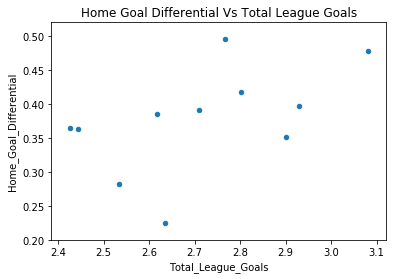

In [23]:
results.plot(x = 'Total_League_Goals', y = 'Home_Goal_Differential', kind = 'scatter', title = 'Home Goal Differential Vs Total League Goals')
results.groupby('League_Name')['Home_Goal_Differential','Total_League_Goals'].mean()

In [24]:
df['intercept'] = 1

lm = sm.OLS(df['Home_Goal_Differential'], df[['intercept', 'Total_League_Goals']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Home_Goal_Differential   R-squared:                       0.016
Model:                                OLS   Adj. R-squared:                  0.016
Method:                     Least Squares   F-statistic:                     425.0
Date:                    Wed, 15 Apr 2020   Prob (F-statistic):           1.13e-93
Time:                            20:03:57   Log-Likelihood:                -51666.
No. Observations:                   25979   AIC:                         1.033e+05
Df Residuals:                       25977   BIC:                         1.034e+05
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept              0.0178      0.021      0.855      0.393      -0.023       0.059
Total_League_Goals     0.1352      0.007     20.615      0.000       0.122       0.148
==============================================================================
Omnibus:                      564.648   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              852.881
Skew:                          -0.233   Prob(JB):                    6.30e-186
Kurtosis:                       3.756   Cond. No.                         6.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/markverso/opt/anaconda3/envs/Investigating_A_Dataset/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Home_Point_Differential,Total_League_Goals
League_Name,,
Belgium Jupiler League,0.550347,2.801505
England Premier League,0.516118,2.710526
France Ligue 1,0.529934,2.443092
Germany 1. Bundesliga,0.444853,2.901552
Italy Serie A,0.589659,2.616838
Netherlands Eredivisie,0.582108,3.080882
Poland Ekstraklasa,0.539062,2.425000
Portugal Liga ZON Sagres,0.434211,2.534600
Scotland Premier League,0.235197,2.633772


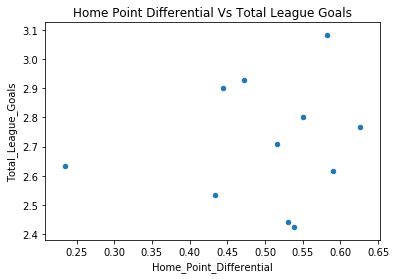

In [25]:
results.plot(x = 'Home_Point_Differential', y = 'Total_League_Goals', kind = 'scatter', title = 'Home Point Differential Vs Total League Goals')
results.groupby('League_Name')['Home_Point_Differential','Total_League_Goals'].mean()

In [26]:
df['intercept'] = 1

lm = sm.OLS(df['Home_Point_Differential'], df[['intercept', 'Total_League_Goals']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Home_Point_Differential   R-squared:                       0.003
Model:                                 OLS   Adj. R-squared:                  0.003
Method:                      Least Squares   F-statistic:                     68.81
Date:                     Wed, 15 Apr 2020   Prob (F-statistic):           1.13e-16
Time:                             20:03:57   Log-Likelihood:                -61043.
No. Observations:                    25979   AIC:                         1.221e+05
Df Residuals:                        25977   BIC:                         1.221e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept              0.3028      0.030     10.117      0.000       0.244       0.361
Total_League_Goals     0.0781      0.009      8.295      0.000       0.060       0.097
==============================================================================
Omnibus:                   157494.809   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2980.233
Skew:                          -0.355   Prob(JB):                         0.00
Kurtosis:                       1.500   Cond. No.                         6.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Based on the regression results comparing total league goals to home goals and points respecitively, neither variable is significantly impacted by total league goals given that the R-squared values in both regressions are close to zero.

<a id='conclusions'></a>
## Conclusions

>These conclusions are based on the results from a dataset that included the (subjective) top eleven leagues in Europe from 2008-2016. These results may be different if the rest of Europe's leagues were included and if more years were included. However, given that this sample includes all of the games of these years over the span of an eight year period with over 25,000 distinct datapoints, this data is robust and is a good representative of the population.

> The Spanish league has the greatest home differential in terms of points and goals while the Scottish league has the lowest in both categories.

> Goal differentials are highly correlated with point differentials and accounts for 73.9% of the variability in the home team's points, but there are a few notable deviations from the norm. For example, the Italian league has a much higher home point differential relative to its home goal differential than other leagues.

>I investigated to see whether the average amount of goals score in a game would impact the home goal differential or the home point differential, but it showed minimal correlation with either.